In [7]:
import pandas as pd

In [8]:
df=pd.read_csv(r"C:\Users\Akash UN\Desktop\Fall_Sem-07\TARP\Model\ecg.csv",header=None)

In [9]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818287,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490658,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [44]:
x=df.loc[3970]
print(df.loc[3970][140])
y=df.columns

0.0


In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

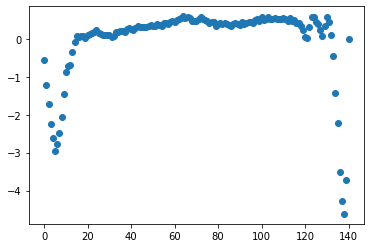

In [46]:
plt.scatter(y,x)

In [47]:
dff=pd.read_excel(r"C:\Users\Akash UN\Desktop\Fall_Sem-07\TARP\Model\single.xlsx")

In [56]:
x=dff['Time']
y=dff['Values']
# x=x.reshape(-1,1)

AttributeError: 'Series' object has no attribute 'reshape'

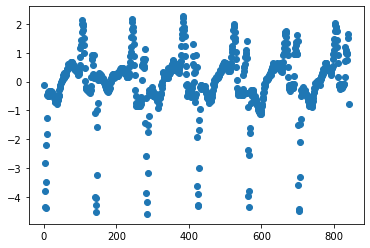

In [49]:
plt.scatter(x,y)

Using Random Forest

In [51]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [83]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
y_train = y_train.values
y_test = y_test.values

# Create a Random Forest regression model
n_estimators = 100  # Number of trees in the forest
max_depth = 4  # Maximum depth of each tree
random_state = 42  # Random seed for reproducibility
model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 0.4448623741019876
R-squared Score: 0.42022067612444525


# Using ID3


In [67]:
from sklearn.tree import DecisionTreeRegressor

In [90]:
tree = DecisionTreeRegressor(max_depth=None, random_state=42)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 0.1276828724712653
R-squared Score: 0.8335937274503968


In [85]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

#Using Linear Regression

In [91]:
from sklearn.linear_model import LinearRegression

In [94]:
lr = LinearRegression()

# Fit the model to the data
lr.fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(X_test)


In [101]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 0.7609559602643696
R-squared Score: 0.008262874486200333


                       Mean Square Error   R2 Score
ID3                    12.77%               83.35%
Random Forest          44.49%               44.42%
Linear Regression      76.09%               0.82% 